# Сборный проект. Определение закономерностей, определяющих успешность игры.

## <a id="0.0"></a>Содержание.
* [1. Знакомство с данными, предварительная обработка данных](#1.)   
* [2. Исследовательский анализ данных.](#2.)  
    * [2.1. Динамика выпуска игр по годам.](#2.1.)  
    * [2.2. Динамика продаж игр по игровым платформам.](#2.2.)  
    * [2.3. Динамика продаж в наше время.](#2.3.)  
    * [2.4. Анализ продаж по платформам с помощью boxplot.](#2.4.)  
    * [2.5. Анализ корреляции рейтинга и продаж.](#2.5.)  
    * [2.6. Зависимость жанра игры от продаж.](#2.6.)  
* [3. Портрет пользователей регионов.](#3.)  
* [4. Проверка гипотез.](#4.)  
    * [4.1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#4.1.)  
    * [4.2. Средние пользовательские рейтинги жанров Action и Sports разные.](#4.2)  

In [32]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

## 1. Знакомство с данными, предварительная обработка данных.<a name="1."></a>
[к содержанию](#0.0)

#### Описание данных
* **Name**— название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sale** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг * компьютерных игр и присваивает им подходящую возрастную категорию.

In [33]:
# считаем таблицу, занесем в переменную games
games = pd.read_csv('datasets/games.csv')

In [34]:
# используя методы head, describe, info, ознакомимся с общей информацией о таблице
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [35]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [36]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Сразу можно выделить следующие аспекты:

* Таблица размерностью 16715, 11;
* Столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating содержат пропущенные значения;
* Название столбцов имеют заглавные буквы;
* Поле год выпуска - Year_of_Release имеет вещественный тип;
* Поле User_Score имеет строковый тип, но это числовая характеристика.

Начнем более детальное знакомство с таблицей и преобразование данных. Для начала переведем название столбцов в нижний регистр.

In [37]:
# используем строковый метод lower для преобразования
games.columns = games.columns.str.lower()

Поле user_score, отражающее оценку пользователей, должно иметь вещественный тип данных. Проверим значения поля, чтобы понять, в чем может быть причина его строкового типа. Выведем уникальные значния поля.

In [38]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видим, в поле есть строковые значения tbd, проверим их количество.

In [39]:
print('Количество значений "tbd" в поле user_score:', games[games.user_score == 'tbd']['user_score'].count())

Количество значений "tbd" в поле user_score: 2424


tbd - **To Be Determined** в различных рейтингах данная абревиатура означает, что продукт не набрал необходимое минимальное количество оценок для выставления рейтинга. В нашем случае это может быть связано с тем, что в рейтинге присутствуют малоизвестные или совсем новые игры. Заменим такие значения на Nan и преобразуем поле в вещественный тип float

In [40]:
# воспользуемся методом replace для замены
games['user_score'] = games['user_score'].replace('tbd', np.NaN).astype(float)

Посмотрим подробнее на поля с пропусками. Посчитаем долю пропущенных значений.

In [41]:
nan_columns = games[['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']].\
    isna().sum().to_frame().reset_index()
nan_columns['nan_part'] = nan_columns[0]/games.shape[0]
nan_columns[['index', 'nan_part']].sort_values(by='nan_part', ascending=False)

,index,nan_part
4,user_score,0.545917
3,critic_score,0.513192
5,rating,0.404786
1,year_of_release,0.016093
0,name,0.000120
2,genre,0.000120


Попытаемся понять возможные причины появления пропусков:
* **user_score** и **critic_score** - уже на этапе знакомства можно увидеть, что таблица содержит игры с годом релиза начинающимся с 1980. Оценки критиков и пользователей вряд ли активно собирались и логировались до широкого распространения интернета и ресурсов-агрегаторов для оценки игрового контента. Также есть вероятность, что некоторые игры имеют значение Nan, так как они не популярны и им не были выставлены оценки в нужном количестве. В данном случае мы не можем заменить Nan характерными значениями - средним или медианой, так как это исказит анализ. Оставим пропуски в данных полях как есть.
* **rating** имеет 40% nan, это может быть обусловлено тем, что не все игры были оценены организацией ESRB. Заменим пропуски на 'not_rated'.
* **year_of_release** содержит 1.6% пропусков, пропуски могут быть связаны с ошибкой логирования или ошибкой при выгрузке. В данном случае также мы не можем заменить nan на характерные значения - оставим как есть.
* **name** и **genre** содержит мизерный процент пропусков, удалим эти значения из таблицы.

In [42]:
# заменим пропуски в rating на 'not_rated'
games['rating'] = games['rating'].fillna('not_rated')

# удалим строки с пропусками в name и genre
games = games[games['name'].notnull()]

Добавим дополнительное поле с совокупными продажами по всем регионам, которое пригодится нам в дальнейшем анализе.

In [43]:
games['total sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Вывод

В первом шаге мы познакомились с данными, изменили тип данных в поле **user_score**, также заменили в нем значения tbd на Nan, 
перевели название столбцов в нижний регистр. Были проанализированы пропуски в полях с рейтингом **user_score** и **critic_score** и даны предположения относительно их появления. Было принято решение не удалять такие строки для возможности более обширного анализа других параметров таблицы. В поле **rating** пропуски заменены на 'not_rated', удалены пропущенные значения в **name** и **genre**, так как таких значений крайне мало и они не могут быт заменены. Был добавлен столбец с совокупными продажами по всем регионам.

## 2. Исследовательский анализ данных.<a name="2."></a>  
[к содержанию](#0.0)

### 2.1. Динамика выпуска игр по годам.<a name="2.1."></a>
[к содержанию](#0.0)

Оценим, как распределяется к-во выпущенных игр по годам, для этого построим график.

In [44]:
# произведем агрегацию по годам 
games_per_years = games.groupby('year_of_release').agg({'name' : 'count'}).reset_index()
games_per_years['year_of_release'] = games_per_years['year_of_release'].astype(int)

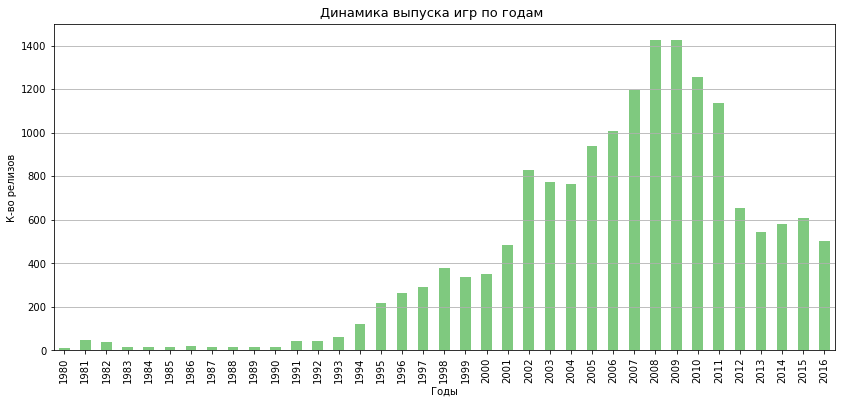

In [45]:
# построим гистограмму распределения выпуска игр по годам
games_per_years.plot(kind='bar', x='year_of_release',  y='name', figsize = (14,6), color='#7FC97F', legend=False)
plt.suptitle('Динамика выпуска игр по годам', fontsize=13, y=0.92)
plt.grid(axis='y')
plt.xlabel("Годы")
plt.ylabel("К-во релизов")
plt.show()

Можно отметить слабое развитие игр вплоть до 1994 года. 1994 во многом знаковый год для индустрии - появление Sony Playstation 1, развитие процессоров семейства Intel Pentium, организация Entertainment Software Rating Board. Можно отметить значимый рост с 2002 года по 2011 и дальнейший спад. Можно связать его с активным развитием социальных сетей и некоторым снижением интереса к игровой индустрии.

### 2.2. Динамика продаж игр по игровым платформам.<a name="2.2."></a>
[к содержанию](#0.0)

Посмотрим, как распределены выпущенные игры по платформам, оценим в проданных копиях.

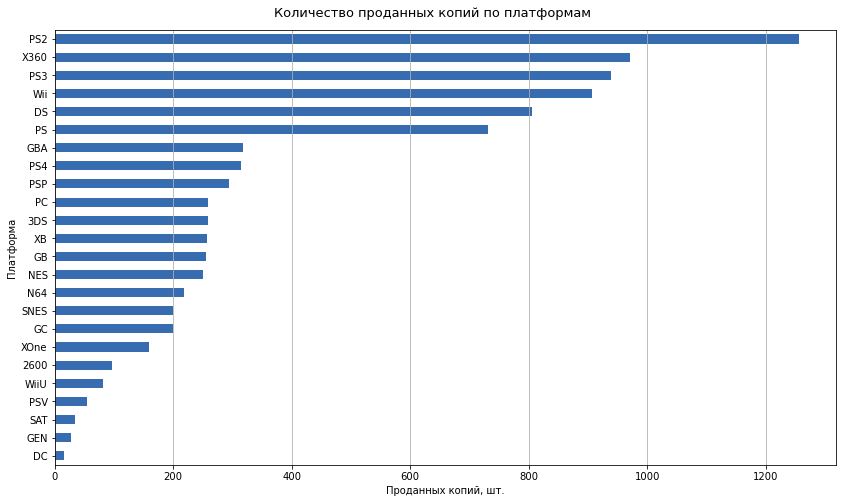

In [46]:
# произведем агрегацию по платформам
games_per_platform = \
    games.groupby('platform').agg({'total sales' : 'sum'}).reset_index().sort_values(by='total sales', ascending=True)

# напишем функцию, которая построит гистограмму распределения игр по платформам
def games_sales_per_platform(games_per_platform):
    games_per_platform.plot(kind='barh', x='platform',  y='total sales', figsize = (14,8), color='#386CB0', legend=False)
    plt.suptitle('Количество проданных копий по платформам', fontsize=13, y=0.92)
    plt.grid(axis='x')
    plt.xlabel("Проданных копий, шт.")
    plt.ylabel("Платформа")
    plt.show()
    
# применим функцию
games_sales_per_platform(games_per_platform[-24:])

Сразу видим лидера - Ps2, а за ней также четко отделены от всех ещё 5 платформ. Посмотрим динамику по годам по топ-6 платформ по продажам.

In [47]:
# Напишем функцию, чтобы собрать динамику по годам по нужным нам платформам и отобразить данные на графике

def games_sales_per_years(games, platform):
    # первый столбец датасета - нужные нам года для анализа
    years = games['year_of_release'].unique()
    years = sorted(years)
    year_of_release = pd.DataFrame(years,columns=['years'])

    # циклом посчитаем сумму по каждой платформе по каждому году, добавим в датасет
    for i in platform:
        l = i
        l = []
        for j in years:
            sales_sum = games.query("year_of_release == @j & platform == @i")['total sales'].sum()
            l.append(sales_sum)
        df = pd.DataFrame(l, columns=[i])
        year_of_release = year_of_release.merge(df, left_index=True, right_index=True)
    
    # построим график динамики продаж по годам по платформам
    year_of_release.replace(0.00, np.NaN).plot(x='years', figsize = (14,6))
    plt.suptitle('Количество проданных копий по платформам по годам', fontsize=13, y=0.92)
    plt.grid()
    plt.xlabel("Годы")
    plt.ylabel("К-во проданных копий")
    plt.legend(bbox_to_anchor=(1.1, 1.02))
    plt.show()

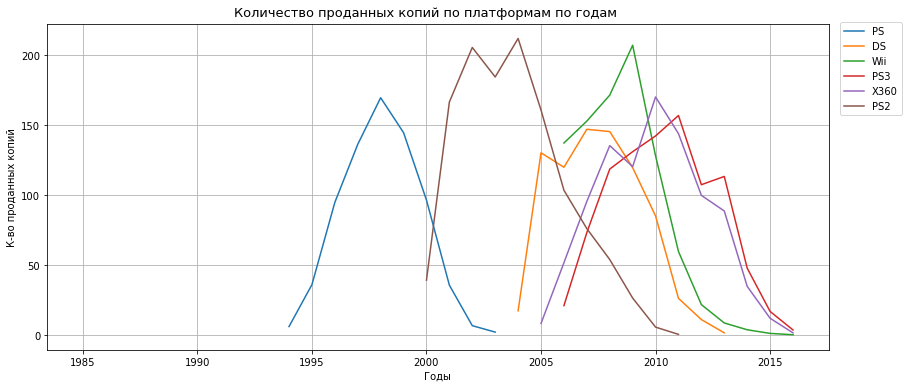

In [48]:
# отберем топ 6 платформ по продажам
platform = list(games_per_platform['platform'])[-6:]

# применим функцию для подсчета продаж по каждой платформе по каждому годы
games_sales_per_years(games, platform)

Из графика видно, что наиболлее активные годы продаж по платформам следующие:

* **PS2** с 2000 по 2011;
* **X360** c 2005 по 2016;
* **PS3** c 2006 по 2016;
* **Wii** c 2006 по 2016;
* **DS** c 2004 по 2013;
* **PS** c 1994 по 2003

Таким образом, продолжительность жизни платформы примерно 10 лет - это обусловлено устареванием железа, и выпуском новых игр, требовательных к нему.

### 2.3. Динамика продаж в наше время.<a name="2.3."></a>
<font size="2">([к содержанию](#0.0))</font>

Для дальнейшего анализа нам необходимо определить **актуальный период.** Исходя из графика выше, мы можем увидеть, что все самые топовые консоли проходят активный этап жизни в период с 2005 по 2016, за исключением PS1. Также этот период включит в себя все недавно выпущенные платформы, которые только развиваются.

Таким образом, актуальный период для дальнейшего анализа - **с 2005 по 2016.**

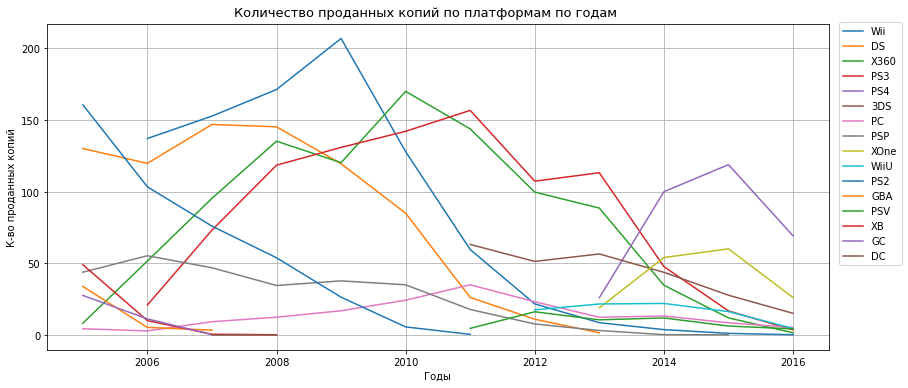

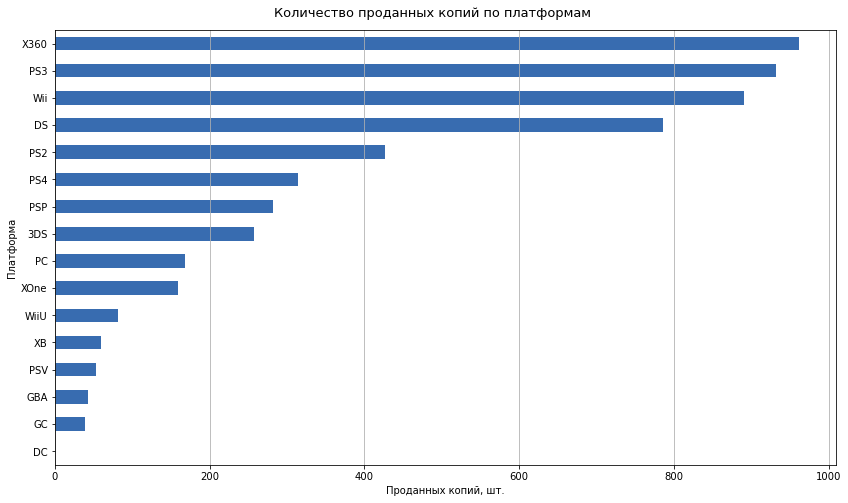

In [49]:
# отберем данные за актуальный период
games_actual = games[games['year_of_release'] >= 2005]

platform = list(games_actual['platform'].unique())

games_per_platform_actual = games_actual.groupby('platform').\
    agg({'total sales' : 'sum'}).reset_index().sort_values(by='total sales', ascending=True)

# применим функцию для подсчета продаж по каждой платформе по каждому году
games_sales_per_years(games_actual, platform)
games_sales_per_platform(games_per_platform_actual)

Можем увидеть, что наибольшие продажи за актуальный период у **X360, PS3, Wii.**  
На конец периода (2016 год) топ платформ по продажам - **PS4, XOne, 3DS.** Важно отметить, что количество проданных копий по этим платформам снижается, что говорит о снижении продаж на рынке игр в целом.



#### 2.4. Анализ продажам по платформам с помощью boxplot<a name="2.4."></a>
<font size="2">([к содержанию](#0.0))</font>

Построим боксплот по всем платформам и оценим общие продажи.

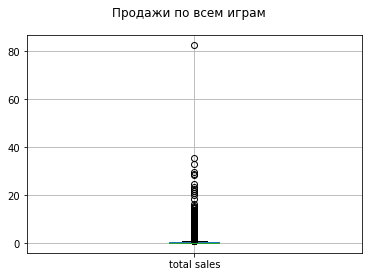

In [50]:
# отберем нужные столбцы из датасета
games_for_boxplot = games_actual[['platform','total sales']]

# построим боксплот
games_for_boxplot.boxplot()
plt.suptitle('Продажи по всем играм')
plt.show()


Как видно, на графике есть выброс в 82 млн.копий, изменим масштаб оси, чтобы рассмотреть ящик.

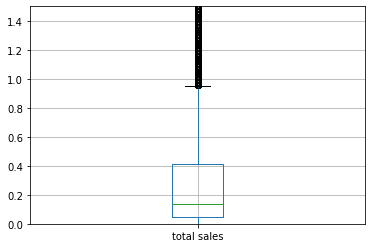

,total sales
count,11272.000000
mean,0.483928
std,1.553076
min,0.000000
25%,0.050000
50%,0.140000
75%,0.410000
max,82.540000


<Figure size 432x288 with 0 Axes>

In [51]:
games_for_boxplot.boxplot()
plt.ylim(0,1.5)
plt.show()
plt.suptitle('Продажи по всем играм')
games_for_boxplot.describe()

Видим, что медиана продажи игр на всех платформах - 0.14 млн. копий. А в среднем игры расходятся тиражом в 0.48 млн. копий.

Построим ящик с усами, и оценим, какие продажи у каждой из топ.платформ.

In [52]:
# возьмем топ-6 платформ за актуальный период
platforms_names = list(games_per_platform_actual['platform'])[-6:]

# циклом соберем датасеты продаж по каждой из платформ
platforms_sales = []
for i in platforms_names:
    k = i
    k = games_for_boxplot[games_for_boxplot['platform'] == i]['total sales']
    platforms_sales.append(k)
    
# помимо графика сформируем таблицы с описательными статистиками по каждой платформе    
platforms_statistics = platforms_sales[0].describe().to_frame()
for i in range(len(platforms_sales)):
    df = platforms_sales[i].to_frame().rename(columns={'total sales': platforms_names[i]}).describe()
    platforms_statistics = platforms_statistics.merge(df, left_index=True, right_index=True)
platforms_statistics = platforms_statistics.iloc[:,1:]

Сразу изменим лимит оси Y до 2 млн., чтобы ящики не были сплюснутыми из-за выбросов.

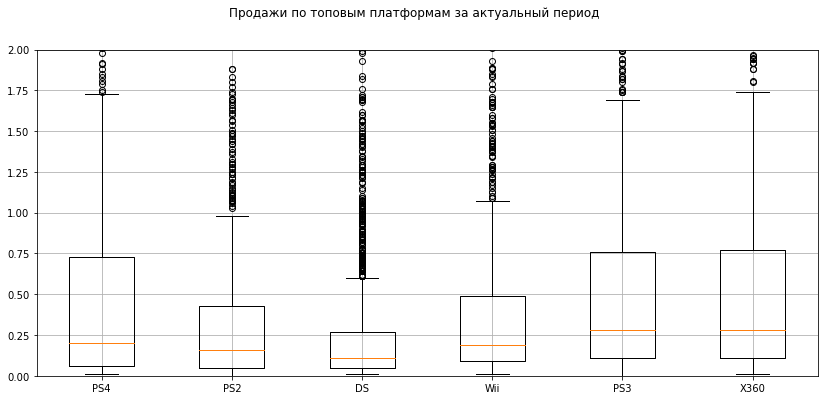

,PS4,PS2,DS,Wii,PS3,X360
count,392.000000,1065.000000,2097.000000,1286.000000,1306.000000,1232.000000
mean,0.801378,0.400432,0.374578,0.692986,0.713124,0.780227
std,1.609456,0.707855,1.427025,3.165022,1.403065,1.632122
min,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000
25%,0.060000,0.050000,0.050000,0.090000,0.110000,0.110000
50%,0.200000,0.160000,0.110000,0.190000,0.280000,0.280000
75%,0.730000,0.430000,0.270000,0.487500,0.760000,0.770000
max,14.630000,5.950000,29.800000,82.540000,21.050000,21.820000


In [53]:
plt.figure(figsize=(14, 6))
plt.boxplot(platforms_sales, labels=platforms_names)
plt.suptitle('Продажи по топовым платформам за актуальный период')
plt.grid()
plt.ylim(0,2)
plt.show()
platforms_statistics

Из графика и таблицы со статистикой видно:
* Медианы лежат в диапазоне от 0.11 до 0.28 млн. копий игры;
* Наименьшая медиана у платформы Nintendo DS, наибольшие у Ps3 и X360;
* Наивысшие границы межквартильных размахов у игр на PS4, PS3, X360 приближаются к 1.75 млн. копий, за границей - выбросы и аномально высокие значения;
* Основная часть игр - 75% продается с тиражем в пределах 0.77 млн. копий.


### 2.5. Анализ корреляции рейтирга и продаж<a name="2.5."></a>
<font size="2">([к содержанию](#0.0))</font>

Проанализируем самую топовую платформу за выбранный нами период - **xbox 360**, и посмотрим корреляцию между отзывами и продажами по данной платформе.

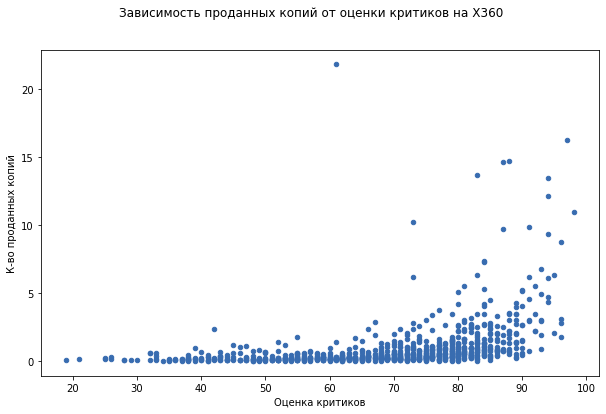

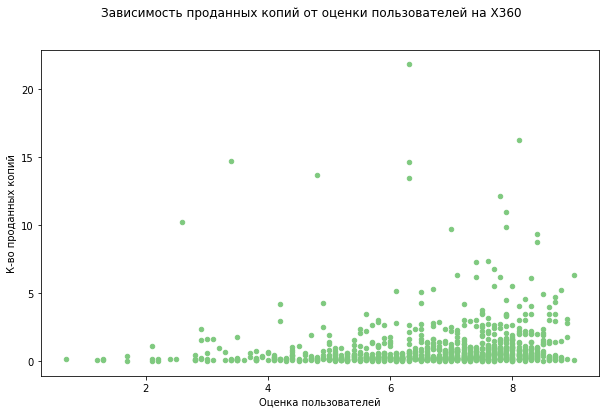



Корреляция количества продаж от рейтингов на X360


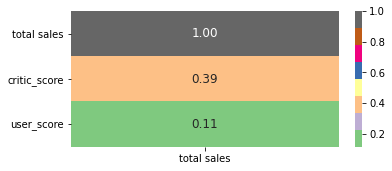

In [54]:
games_actual_x360 = games_actual[games_actual['platform'] == 'X360']\
    [['total sales', 'critic_score', 'user_score']]


games_actual_x360.plot(kind='scatter', x='critic_score' , y='total sales', figsize=(10, 6), color='#386CB0')
plt.suptitle('Зависимость проданных копий от оценки критиков на X360')
plt.xlabel("Оценка критиков")
plt.ylabel("К-во проданных копий")
plt.show()
games_actual_x360.plot(kind='scatter', x='user_score' , y='total sales', figsize=(10, 6), color='#7FC97F')
plt.suptitle('Зависимость проданных копий от оценки пользователей на X360')
plt.xlabel("Оценка пользователей")
plt.ylabel("К-во проданных копий")
plt.show()
print(),print(),print('\033[1m' + 'Корреляция количества продаж от рейтингов на X360' + '\033[0m')
plt.figure(figsize=(6,2.5))
sns.heatmap(games_actual_x360.corr()[['total sales']], annot=True, cmap='Accent', fmt='.2f', annot_kws={'size':12})
plt.show()

Как видно из графиков, более сильная корреляция прослеживается у продаж и оценок, выставленных критиками. Это может быть связано с тем, что пользователи чаще опираются на мнения авторитетных ресурсов, таких как Metacritic и рецензии известных критиков, чем на рейтинги рядовых пользователей. Кроме того, оценка известного критика - это дополнительная реклама для игры.

Посмотрим на остальные консоли из топ-6 по проданным копиям.

Корреляция количества продаж от рейтингов на PS4


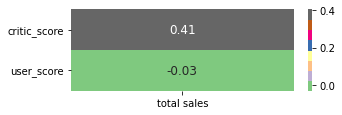


Корреляция количества продаж от рейтингов на PS2


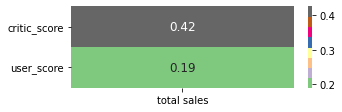


Корреляция количества продаж от рейтингов на DS


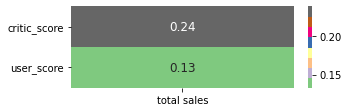


Корреляция количества продаж от рейтингов на Wii


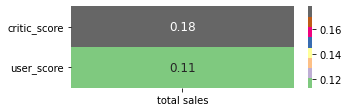


Корреляция количества продаж от рейтингов на PS3


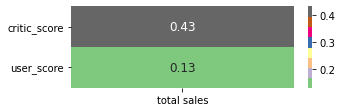

In [55]:
for name in platforms_names[:-1]:
    df = games_actual[games_actual['platform'] == name][['total sales', 'critic_score', 'user_score']]
    print('\033[1m' + 'Корреляция количества продаж от рейтингов на '+ name + '\033[0m')
    plt.figure(figsize=(5,1.5))
    sns.heatmap(df.corr()[['total sales']].iloc[1:], annot=True, cmap="Accent", fmt='.2f', annot_kws={'size':12})
    plt.show()
    print()

Зависимость оценок от продаж у остальных топ-платформ похожа на зависимость у X360 - во всех случаях оценки критиков сильнее коррелируют с количеством проданных копий, чем оценки пользователей. 

### 2.6. Зависимость жанра игры от продаж.<a name="2.6."></a>
<font size="2">([к содержанию](#0.0))</font>

Посмотрим, какие продажи у разных жанров.

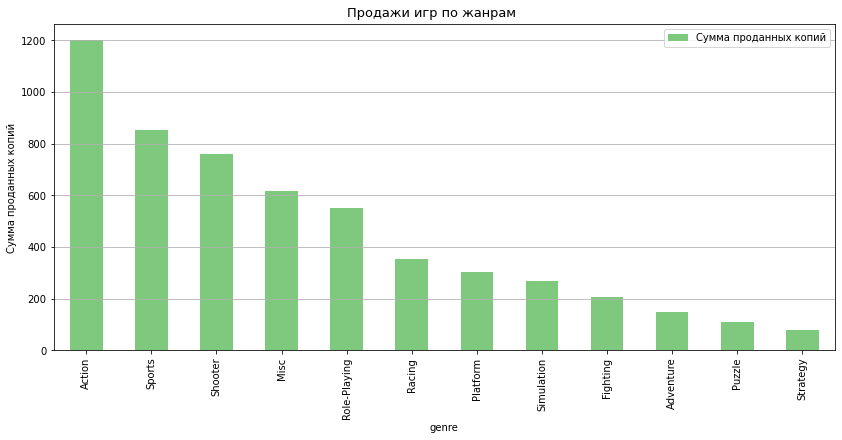

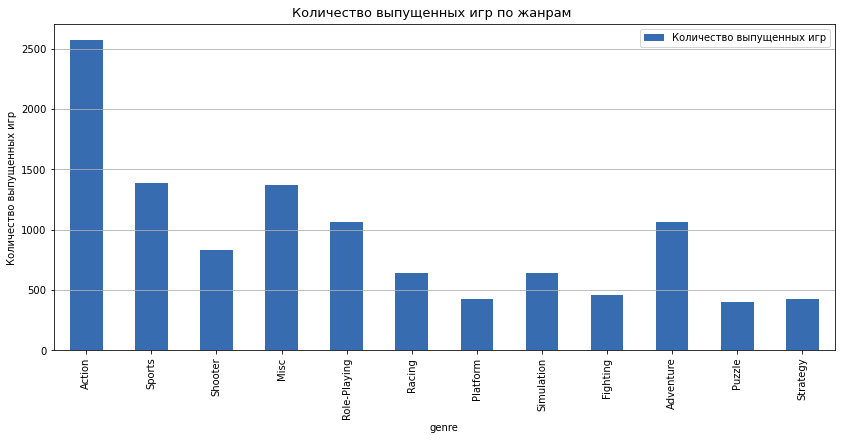

In [56]:
genre_sales = games_actual.groupby('genre').agg({'total sales':'sum', 'name':'count'})\
    .rename(columns={'total sales':'Сумма проданных копий', 'name':'Количество выпущенных игр'})\
    .sort_values(by='Сумма проданных копий', ascending=False)


genre_sales.plot(kind='bar', y='Сумма проданных копий', figsize = (14,6), color='#7FC97F')
plt.suptitle('Продажи игр по жанрам', fontsize=13, y=0.92)
plt.grid(axis='y')
plt.ylabel("Сумма проданных копий")
plt.show()

genre_sales.plot(kind='bar', y='Количество выпущенных игр', figsize = (14,6), color='#386CB0')
plt.suptitle('Количество выпущенных игр по жанрам', fontsize=13, y=0.92)
plt.grid(axis='y')
plt.ylabel("Количество выпущенных игр")
plt.show()

Основные лидеры по проданным копиям:
* **Action**
* **Sports**
* **Shooter**

Замыкают рейтинг такие жанры, как:
* **Adventure**
* **Puzzle**
* **Strategy**

Что любопытно, жанр Adventure при относительно высоком количестве игр продается небольшим тиражом. Для примера жанр Shooter при меньшем к-ве игр продается в разы больше.

## Вывод

На основе анализа датасета были выявлены следующие особенности рынка компьютерных игр:

1. Наиболее популярной за все время индустрии с точки зрения к-ва проданных игр стала платформа **Sony Playstation 2.** Совокупный объем проданных копий игр на данной приставке перевалил за 1.2 миллиарда. Следом за Ps2 идут X360, PS3, Wii, DS, PS.
2. Средняя продолжительность жизни игровой платформы составляет примерно 10 лет, со временем железо устаревает, пользователи и производители игр хочется хлеба и более качественных зрелищ, поэтому они переходят на более новые платформы.
3. Актуальным периодом для анализа игр можно считать период с 2005 по 2016, в этот период продалось больше всего игр на платформах **X360, PS3, Wii**. 
4. На 2016 год топ продаж составляют **PS4, XOne, 3DS**. Важно отметить, что количество проданных копий по этим платформам снижается, что возможно, говорит о снижении продаж на рынке игр в целом.
5. Медиана продаж игр по всем платформам 140 тысяч копий. Основная часть игр - 75% продается с тиражом в пределах 770 тысяч копий.
6. Наибольшая корреляция наблюдается между к-вом проданных копий и оценкой критиков, например, коэффициент корреляции у Ps2 составил **0,43**. Намного более слабая корреляция наблюдается между к-вом проданных копий и оценкой пользователей. Это может быть связано с тем, что пользователи чаще опираются на мнения авторитетных ресурсов, таких как Metacritic и рецензии известных критиков, чем на рейтинги рядовых пользователей. Кроме того, положительные рецензии критиков - это дополнительная реклама.
7. Больше всего продаются игры в жанрах **Action, Sports, Shooter**, меньше всего продаются игры в жанрах **Adventure, Puzzle, Strategy.**

## 3. Портрет пользователя регионов NA, EU, JP<a name="3."></a>
<font size="2">([к содержанию](#0.0))</font>

### Самые популярные платформы в регионах

Составим портрет пользователя каждого региона. Для начала рассмотрим самые популярные платформы.

In [57]:
# напишем функцию для фильтрации данных по заданному параметру и прорисовке графиков
def top5_by_regions(data, parametr):
    regions_by_platforms = data.groupby(parametr).\
    agg({'na_sales' : 'sum','eu_sales' : 'sum', 'jp_sales' : 'sum'}).reset_index()
    
    na_sales = regions_by_platforms[[parametr,'na_sales']].sort_values(by='na_sales',ascending=False).head()
    eu_sales = regions_by_platforms[[parametr,'eu_sales']].sort_values(by='eu_sales',ascending=False).head()
    jp_sales = regions_by_platforms[[parametr,'jp_sales']].sort_values(by='jp_sales',ascending=False).head() 
    
    na_sales['part'] = na_sales['na_sales'] / na_sales['na_sales'].sum()
    eu_sales['part'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()
    jp_sales['part'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()
    
    datasets = [na_sales[[parametr, 'part']].\
                round(2), eu_sales[[parametr, 'part']].round(2), jp_sales[[parametr, 'part']].round(2)]
    colours = ['#7FC97F','#386CB0','#666666']
    regions = ['NA','EU','JP']
    for i in range(len(datasets)):
        datasets[i].plot(kind='bar', x=parametr, color=colours[i], figsize = (8,6), legend=False)
        plt.grid(axis='y')
        plt.suptitle('Регион ' + regions[i])
        plt.xlabel(parametr)
        plt.ylabel("Доля от продаж в топ-5")
        plt.show()
        print()

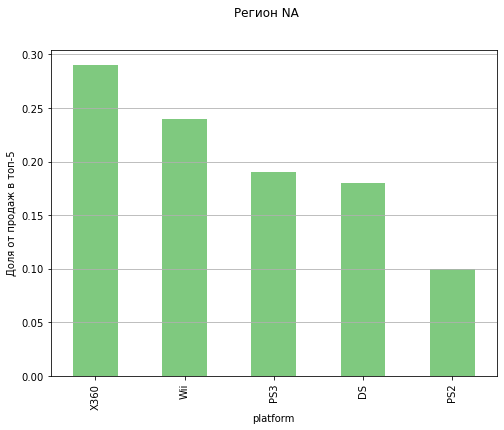

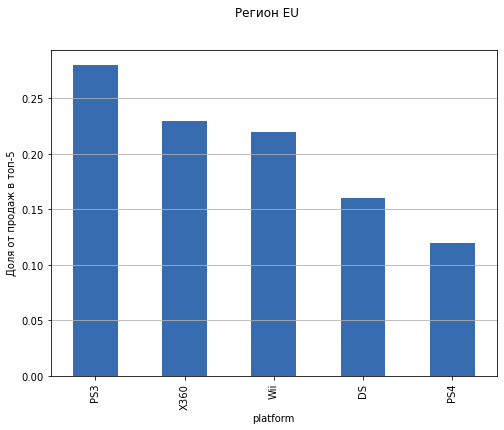

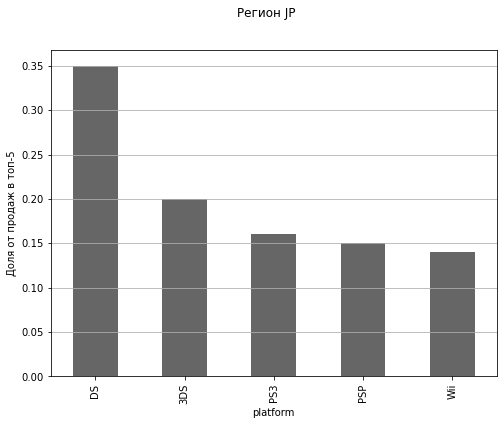

In [58]:
# Используем функцию для анализа по платформам
top5_by_regions(games_actual, 'platform')

Как видно из графиков, в Северной Америке наибольшую популярность имеет X360, за ним идёт Wii. Примерно одинаково любимы остаются PS3 и DS, а за ними идёт сдающая позиции PS2.

В Европе позиции распределились иначе - здесь PS3 заметно популярнее, чем на западе. Примерно на одинаковых позициях находятся X360 и Wii, за ними идут DS и набирающая обороты PS4.

Что касается Японии, тут со значительным отрывом побеждает национальная любимица DS. За ней идет её младшая сестра 3DS, затем PS3, PSP и Wii. Занимательно, что большая часть топа - это портативные игровые консоли. 

### Самые популярные жанры в регионах

Рассмотрим наиболее популярные жанры по регионам.

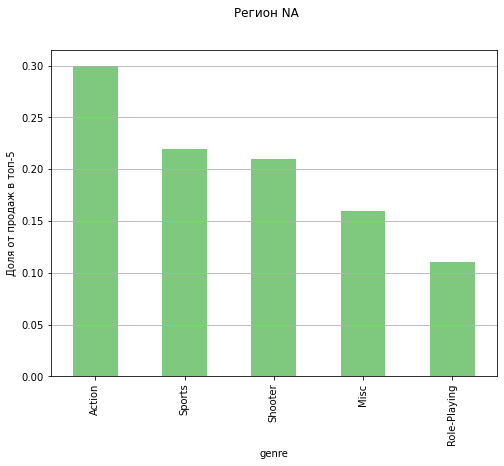

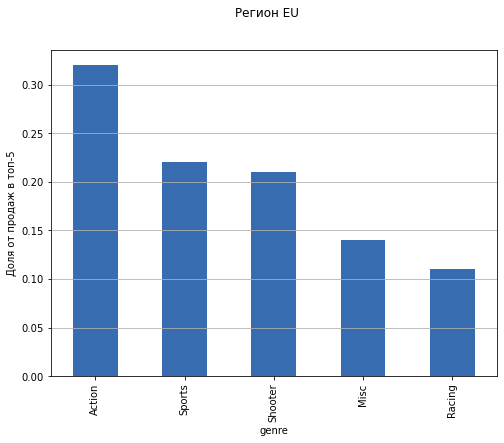

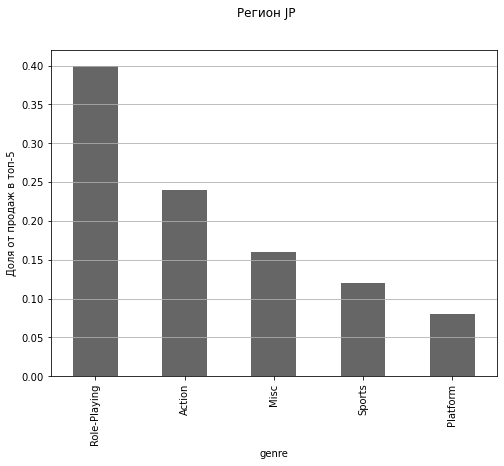

In [59]:
# Используем функцию для анализа по жанрам
top5_by_regions(games_actual, 'genre')

Вкусы в Северной Америке и Европе схожи - в топе экшн, спортивные игры и шутеры. Однако в Америке чаще выбирают ролёвки, а Европе ближе гонки. 

В Японии огромную популярность имеют ролевые игры, за ними с большим отрывом идут экшены, разножанровые, спортивые игры и платформеры.

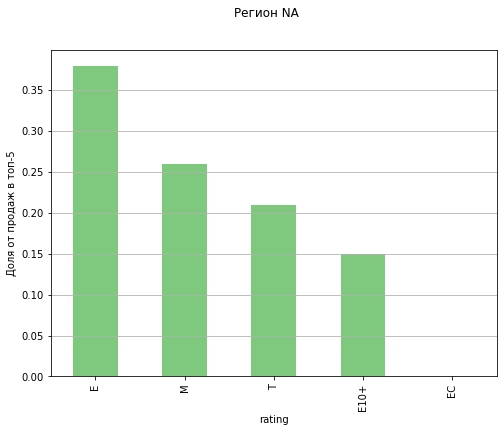

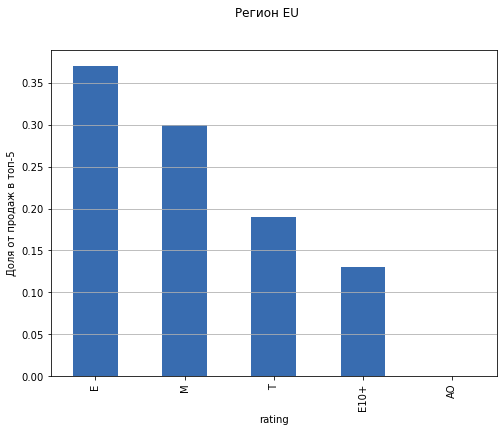

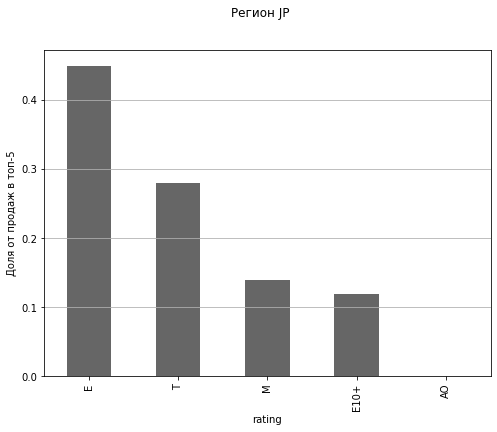

In [60]:
# Используем функцию для анализа по ESRB
top5_by_regions(games_actual[games_actual['rating'] != 'not_rated'], 'rating')

Во всех трёх регионах лидирующую позицию занимают игры с рейтингом E, то есть подходящие для всех возрастов.

Дальше картина немного меняется - если у Америки и Европы на втором месте игры для людей 17+, а на третьем игры для подростков, то в Японии дело обстоит иначе - большими тиражами расходят подростковые игры 13+, а за ними уже идут игры с рейтингом 17+.

Примечательно, что из всех трёх регионов только в Америке в топ вышли игры с рейтингом EC (Early Childhood), предназначенные для маленьких детей. 

## Вывод

В Северной Америке наибольшую популярность имеет X360, за ним идёт Wii. Примерно одинаково любимы остаются PS3 и DS, а за ними идёт сдающая позиции, но всё ещё держащая оборону PS2. Вкусы в жанрах схожи с европейскими - в топе экшн, спортивные игры и шутеры, но более сильные позиции (чем в Европе) имеют ролевые игры. Больше всего копий продаётся у игр, подходящих для всех возрастов, затем идет игры с рейтингом 17+, затем подростковые 13+. Примечательно, что только в Америке в топ вышли игры, предназначенные для маленьких детей. 

В Европе позиции распределились иначе - здесь PS3 заметно популярнее, чем на западе. Примерно на одинаковых позициях находятся X360 и Wii, за ними идут DS и набирающая обороты PS4. Вкусы в жанрах схожи с американскими, но на замену американским ролёвкам в топ выходят гонки (привет, Гран-при Монако! Неудивительно, что европейцы выбирают гонки). Распределение по возрастным рейтингам почти такое же, как в Америке - игры для всех, игры для категории 17+, игры для подростков, игры для детей 10+, игры для взрослых. 

Что касается Японии, тут со значительным отрывом побеждает национальная любимица DS. За ней идет её младшая сестра 3DS, затем PS3, PSP и Wii. Занимательно, что большая часть топа - это портативные игровые консоли. Огромную популярность имеют ролевые игры, за ними с большим отрывом идут экшены, разножанровые, спортивые игры и платформеры. С небольшими изменениями распределение по рейтингу повторяет европейское - разве что в Японии доля игр для подростков значительно больше, она выходит на второе место после игр, предназначенных для всех возрастов.  

## 4. Проверка гипотез<a name="4."></a>
<font size="2">([к содержанию](#0.0))</font>

Проверим 2 гипотезы:
* Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### 4.1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.<a name="4.1."></a>
<font size="2">([к содержанию](#0.0))</font>

**Н0** - (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
**Н1** - (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [61]:
XOne = games_actual[(games_actual['user_score'].notnull()) & (games_actual['platform'] == 'XOne')]['user_score']
PC = games_actual[(games_actual['user_score'].notnull()) & (games_actual['platform'] == 'PC')]['user_score']

In [62]:
# Посчитаем P-value
alpha = .05

results = st.ttest_ind(
    XOne, 
    PC)

print('Пороговое значение alpha =', alpha)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print('Средний пользовательский рейтинг XOne:', XOne.mean())
print('Средний пользовательский рейтинг PC:', PC.mean())

Пороговое значение alpha = 0.05
p-значение: 0.0036925827463950033
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг XOne: 6.52142857142857
Средний пользовательский рейтинг PC: 6.8849378881987695


Мы получили очень малое p-значение, что дает основание отвергнуть Но, различия в выручке тарифов статистически значимо различаются в ген.совокупности.

### 4.2 Средние пользовательские рейтинги жанров Action и Sports разные.<a name="4.2"></a>
<font size="2">([к содержанию](#0.0))</font>

**Н0** - (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
**Н1** - (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports различаются.

In [63]:
Action = games_actual[(games_actual['user_score'].notnull()) & (games_actual['genre'] == 'Action')]['user_score']
Sports = games_actual[(games_actual['user_score'].notnull()) & (games_actual['genre'] == 'Sports')]['user_score']

In [64]:
# Посчитаем P-value
alpha = .05

results = st.ttest_ind(
    Action, 
    Sports)

print('Пороговое значение alpha =', alpha)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print('Средний пользовательский рейтинг Action:', Action.mean())
print('Средний пользовательский рейтинг Sports:', Sports.mean())

Пороговое значение alpha = 0.05
p-значение: 6.299384839540833e-10
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг Action: 6.947026657552966
Средний пользовательский рейтинг Sports: 6.53949801849406


Мы получили очень малое p-значение, что дает основание отвергнуть Но, различия в выручке тарифов статистически значимо различаются в ген.совокупности.

## Общий вывод

Был проведен анализ рынка игровой индустрии. Наиболее популярной за все время индустрии с точки зрения к-ва проданных игр стала платформа **Sony Playstation 2**, совокупный объем проданных копий игр на данной приставке перевалил за 1.2 миллиарда. Средняя продолжительность жизни игровой платформы составляет примерно 10 лет. 
На 2016 год топ продаж составляют **PS4, XOne, 3DS**. Важно отметить, что количество проданных копий по этим платформам снижается, что возможно, говорит о снижении продаж на рынке игр в целом.

Больше всего продаются игры в жанрах **Action, Sports, Shooter**, меньше всего продаются игры в жанрах **Adventure, Puzzle, Strategy.**

Наибольшая корреляция наблюдается между к-вом проданных копий и оценкой критиков, например, коэффициент корреляции у Ps2 составил **0,43**. Намного более слабая корреляция наблюдается между к-вом проданных копий и оценкой пользователей. Это может быть связано с тем, что пользователи чаще опираются на мнения авторитетных ресурсов, чем на рейтинги рядовых пользователей. Кроме того, положительные рецензии критиков - это дополнительная реклама.

По регионам картинка отражает сильное противопоставление Америки&Европы и Японии. Если в Америке и Европе в топе классическое трио X360, Wii PS3, то в Японии гораздо больший упор идёт на портативные платформы - DS, 3DS и PSP. Вкусы в жанрах тоже отличаются. В Америке и Европе в топе экшены, шутеры и спортивные игры, а в Японии гораздо более внушительные продажи имеют ролевые игры, а шутеры даже не попаают в топ. Вне зависимости от локации обладают популярностью игры, предназначенные для всех возрастов, но в Японии серьезные позиции имеют игры, предназначенные для подростков, а в Америке в топ попали игры для детей младшего возраста. 

Были проверены 2 гипотезы:
* Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

Выводы которые можно сделать после проверки гипотез:  
* Cредние пользовательские рейтинги платформ Xbox One и PC отличаются;
* Средние пользовательские рейтинги жанров Action и Sports отличаются.